# ARIMA 학습데이터 준비

In [59]:
import pandas as pd
import os
interseting = pd.read_excel("C:\workspace\dataset\interesting.xlsx", engine='openpyxl')
coordinate = pd.read_excel("C:\workspace\dataset\coordinate.xlsx", engine='openpyxl')
index_seoul = coordinate[coordinate['시도']=='서울특별시'].index
coordinate = coordinate.loc[index_seoul,:]
coordinate.drop(['코드종류','하위'], axis= 1, inplace = True)

def data_control(x):
    x = x.reset_index()
    x.drop('여자70세이상생활인구수', axis = 1, inplace = True)
    x.columns = ['기준일ID', '시간대구분', '행정동코드', '총생활인구수', '남자0세부터9세생활인구수',
                 '남자10세부터14세생활인구수', '남자15세부터19세생활인구수', '남자20세부터24세생활인구수',
                 '남자25세부터29세생활인구수', '남자30세부터34세생활인구수', '남자35세부터39세생활인구수',
                 '남자40세부터44세생활인구수', '남자45세부터49세생활인구수', '남자50세부터54세생활인구수',
                 '남자55세부터59세생활인구수', '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수',
                 '여자0세부터9세생활인구수', '여자10세부터14세생활인구수', '여자15세부터19세생활인구수',
                 '여자20세부터24세생활인구수', '여자25세부터29세생활인구수', '여자30세부터34세생활인구수',
                 '여자35세부터39세생활인구수', '여자40세부터44세생활인구수', '여자45세부터49세생활인구수',
                 '여자50세부터54세생활인구수', '여자55세부터59세생활인구수', '여자60세부터64세생활인구수',
                 '여자65세부터69세생활인구수', '여자70세이상생활인구수']
    
    x['행정동코드'] = x['행정동코드'].apply(lambda x : x * 100 )
    x_new = x.merge(coordinate, left_on = '행정동코드', right_on='코드', how = 'left')
    x_new.dropna(axis = 0, inplace = True)
    x_new['Datetime'] = x_new[['기준일ID','시간대구분']].apply(lambda x: ' '.join(x.values.astype(str)), axis=1)
    x_new['Datetime'] = x_new['Datetime'].apply(lambda x : str(x)+'0:00:00' if len(str(x)) == 1 else str(x)+':00:00')
    x_new['Datetime'] = pd.to_datetime(x_new['Datetime'])
    x_new.drop(columns = ['행정동코드','코드','시도','기준일ID','시간대구분','위도','경도'], axis = 1, inplace = True)
    x_new = x_new.groupby(['시군구','읍면동','Datetime']).mean()
    
    return x_new

files = os.listdir("C:\workspace\dataset")
files = files[3:]
for i in files:
    globals()[i.split('.')[0]] = data_control(pd.read_csv(f'C:/workspace/dataset/{i}'))
    print("Merge DataFrame : {0}".format(i.split('.')[0]))

Merge DataFrame : popl_1
Merge DataFrame : popl_2
Merge DataFrame : popl_3
Merge DataFrame : popl_4
Merge DataFrame : popl_5
Merge DataFrame : popl_6
Merge DataFrame : popl_7
Merge DataFrame : popl_8
Merge DataFrame : popl_ly10
Merge DataFrame : popl_ly11
Merge DataFrame : popl_ly12
Merge DataFrame : popl_ly8
Merge DataFrame : popl_ly9


In [60]:
def data_pr(df):
    df2 = df.copy()
    df2 = df2.reset_index()
    df2.loc[(df2['시군구']=='관악구') & (df2['읍면동']=='신사동'),'읍면동']= '관악'+df2.loc[(df2['시군구']=='관악구') & (df2['읍면동']=='신사동'),'읍면동']
    df2.drop(columns = ['시군구', '총생활인구수'], axis = 1, inplace = True)
    df2 = df2.set_index('Datetime')
    df2['M-Infant'] = df2['남자0세부터9세생활인구수']
    df2['W-Infant'] = df2['여자0세부터9세생활인구수']
    df2['M-Seventies'] = df2['남자70세이상생활인구수']
    df2['W-Seventies'] = df2['여자70세이상생활인구수']
    df_rest = df2[['M-Infant','W-Infant','M-Seventies','W-Seventies','읍면동']]
    df2.drop(columns = ['남자0세부터9세생활인구수','여자0세부터9세생활인구수','남자70세이상생활인구수'
                  ,'여자70세이상생활인구수','M-Infant','W-Infant','M-Seventies','W-Seventies','읍면동'], axis = 1, inplace = True)
    
    new_columns = ['M-Teen','M-Twenties','M-Thirties','M-Fourties','M-Fifties','M-Sixties',
             'W-Teen','W-Twenties','W-Thirties','W-Fourties','W-Fifties','W-Sixties']
    
    a = 0
    b = 2
    for i in new_columns:
        df2[i] = df2.iloc[:, a:b].sum(axis=1)
        a += 2
        b += 2
    df2.drop(columns = ['남자10세부터14세생활인구수', '남자15세부터19세생활인구수', '남자20세부터24세생활인구수',
       '남자25세부터29세생활인구수', '남자30세부터34세생활인구수', '남자35세부터39세생활인구수',
       '남자40세부터44세생활인구수', '남자45세부터49세생활인구수', '남자50세부터54세생활인구수',
       '남자55세부터59세생활인구수', '남자60세부터64세생활인구수', '남자65세부터69세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수'], axis =1, inplace = True)
    df2 = pd.concat([df2, df_rest], axis = 1)
    return df2

popl_1= data_pr(popl_1)
popl_2= data_pr(popl_2)
popl_3= data_pr(popl_3)
popl_4= data_pr(popl_4)
popl_5= data_pr(popl_5)
popl_6= data_pr(popl_6)
popl_7 = data_pr(popl_7)
popl_8 = data_pr(popl_8)
popl_ly10 = data_pr(popl_ly10)
popl_ly11 = data_pr(popl_ly11)
popl_ly12 = data_pr(popl_ly12)
popl_ly8 = data_pr(popl_ly8)
popl_ly9 = data_pr(popl_ly9)

In [9]:
popl_ly8, popl_ly9, popl_ly10, popl_ly11, popl_ly12

총생활인구수  남자0세부터9세생활인구수  남자10세부터14세생활인구수  \
시군구 읍면동   Datetime                                                          
강남구 개포1동  2022-07-01 00:00:00  10153.5147       388.4706         246.3664   
          2022-07-01 01:00:00  10217.7380       392.4466         248.8878   
          2022-07-01 02:00:00  10273.9661       375.7838         238.3207   
          2022-07-01 03:00:00  10324.6230       401.5962         254.6906   
          2022-07-01 04:00:00  10559.8683       401.0014         254.3131   
...                                   ...            ...              ...   
중랑구 중화제2동 2022-07-31 19:00:00  26550.9994       725.9214         326.7645   
          2022-07-31 20:00:00  26706.1665       666.5085         300.0211   
          2022-07-31 21:00:00  26338.2819       692.2413         311.6045   
          2022-07-31 22:00:00  26200.8733       733.9896         330.3968   
          2022-07-31 23:00:00  24923.1867       724.6740         326.2030   

                               남자15세부터19세생활인구수  남자20세부터24세생활인구수  \
시군구 읍면동   Datetime                                                
강남구 개포1동  2022-07-01 00:00:00         339.8649         168.6935   
          2022-07-01 01:00:00         327.0928         178.5808   
          2022-07-01 02:00:00         320.6672         217.2536   
          2022-07-01 03:00:00         351.3734         205.0623   
          2022-07-01 04:00:00         335.3007         206.3958   
...                                        ...              ...   
중랑구 중화제2동 2022-07-31 19:00:00         471.7591         785.0619   
          2022-07-31 20:00:00         460.4353         790.8732   
          2022-07-31 21:00:00         433.3332         761.0830   
          2022-07-31 22:00:00         453.7423         773.5172   
          2022-07-31 23:00:00         445.8193         703.6685   

                               남자25세부터29세생활인구수  남자30세부터34세생활인구수  \
시군구 읍면동   Datetime                                                
강남구 개포1동  2022-07-01 00:00:00         214.4678         244.6072   
          2022-07-01 01:00:00         207.0972         252.2343   
          2022-07-01 02:00:00         207.7113         251.3015   
          2022-07-01 03:00:00         200.3689         244.8775   
          2022-07-01 04:00:00         205.2451         256.9711   
...                                        ...              ...   
중랑구 중화제2동 2022-07-31 19:00:00         838.9427         950.3716   
          2022-07-31 20:00:00         867.4637         956.6450   
          2022-07-31 21:00:00         897.5353         921.4762   
          2022-07-31 22:00:00         906.8252         911.2681   
          2022-07-31 23:00:00         824.8858         868.9277   

                               남자35세부터39세생활인구수  남자40세부터44세생활인구수  \
시군구 읍면동   Datetime                                                
강남구 개포1동  2022-07-01 00:00:00         394.6768         428.9368   
          2022-07-01 01:00:00         403.0646         430.5585   
          2022-07-01 02:00:00         429.4993         432.6504   
          2022-07-01 03:00:00         423.2436         438.9705   
          2022-07-01 04:00:00         426.0653         445.8313   
...                                        ...              ...   
중랑구 중화제2동 2022-07-31 19:00:00        1198.8481         941.3553   
          2022-07-31 20:00:00        1162.4149         951.4141   
          2022-07-31 21:00:00        1163.6825         957.5450   
          2022-07-31 22:00:00        1137.5633         954.4078   
          2022-07-31 23:00:00        1076.4543         882.4487   

                               남자45세부터49세생활인구수  ...  여자25세부터29세생활인구수  \
시군구 읍면동   Datetime                              ...                    
강남구 개포1동  2022-07-01 00:00:00         453.3529  ...         187.2276   
          2022-07-01 01:00:00         444.7980  ...         202.4706   
          2022-07-01 02:00:00         446.6712  ...         199.6997   
          2022-07-01 03:00:00         454.4950  ...      

---
# ARIMA란?
- ARIMA(Autoregressive Integrated Moving Average)는 AR 모형과 MA 모형을 합쳐 차분을 적용한 모형이다.
    - AR(Auto Regressive Model)이란?
        - p 시점 전의 자료가 현재 자료에 영향을 주는 자기회귀 모델
        - 즉, 이전 자신의 관측값이 이후 자신의 관측값에 영향을 준다는 아이디어에서 기반함.
    - MA(Moving Average Model)이란?
        - 일정한 p구간의 데이터들의 평균을 계산하여, 미래를 예측하는 방법
        - 시계열의 불규칙적인 변동을 제거하기 위함.
    - Difference(차분)이란?
        - 정상성(Stationary)을 만족하지 못하는 시계열 데이터를 정상성이 만족하는 데이터로 변환
        <br>
- ARIMA 모형은 시계열 데이터의 정상성(Stationary)를 가정하고 있다.
    - 정상성이란?
        - 평균, 분산이 시간에 따라 일정한 성질이다. 즉, 추세나 계절성이 있는 시계열은 정상 시계열이 아니다.
        
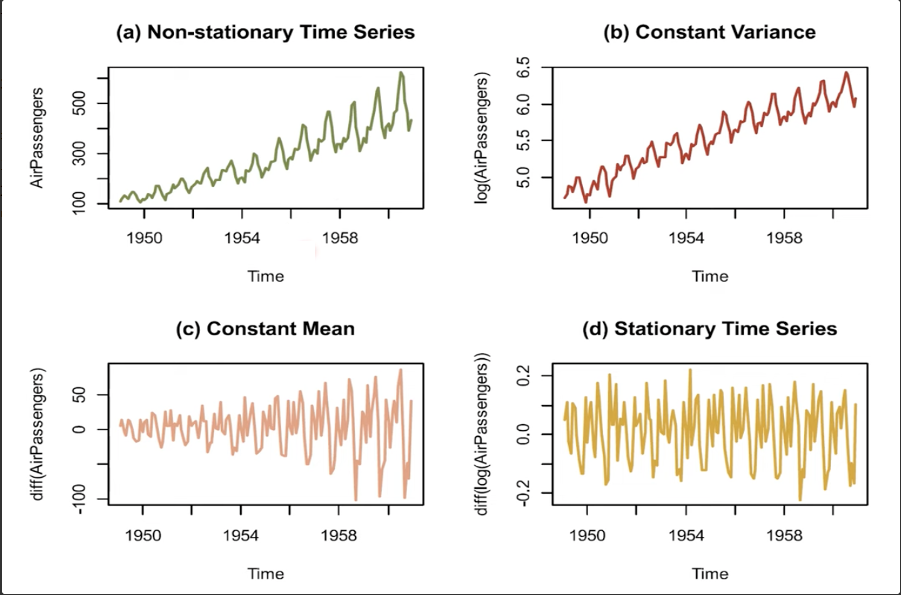
- 변동폭이 일정하지 않은 경우 : 로그변환
- 추세, 계절성이 존재하는 경우 : 차분
<br>

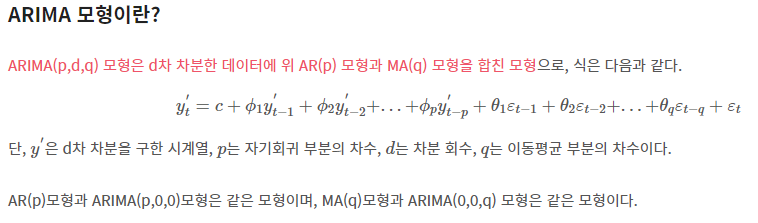

---

In [19]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
plt.style.use('seaborn-whitegrid')
%matplotlib inline

---
# Seasonal_Decomposition
#### seasonal_deomposition은 시계열 그래프를 트랜드, 계절성, 잔차로 decompose해가는 모듈이다.
- Trend = 이동평균 값을 그린 것이다.
- Seasonal = 우선 trend를 제거한 데이터(detrended series)를 도출한다. 각 월별로 seasonality를 도출하는 상황이라면 3월의 detrended value 끼리 모은 뒤 평균을 내면 된다. 그리고 이것을 평균을 내면 해당 주기의 영향력가 된다. 여기서 각 주기의 seasonality는 trend에 대한 상대적인 증가 혹은 감소를 나타내므로 합이 0이 되도록 조정된다.
- Residual = Trend와 Seasonal을 모두 제거한 뒤 시계열로는 설명할 수 없는 잔차다. Residual로 model을 'Additive'로 할 것인지, 'multiplicative'로 할 것인지 파악하면된다.
---

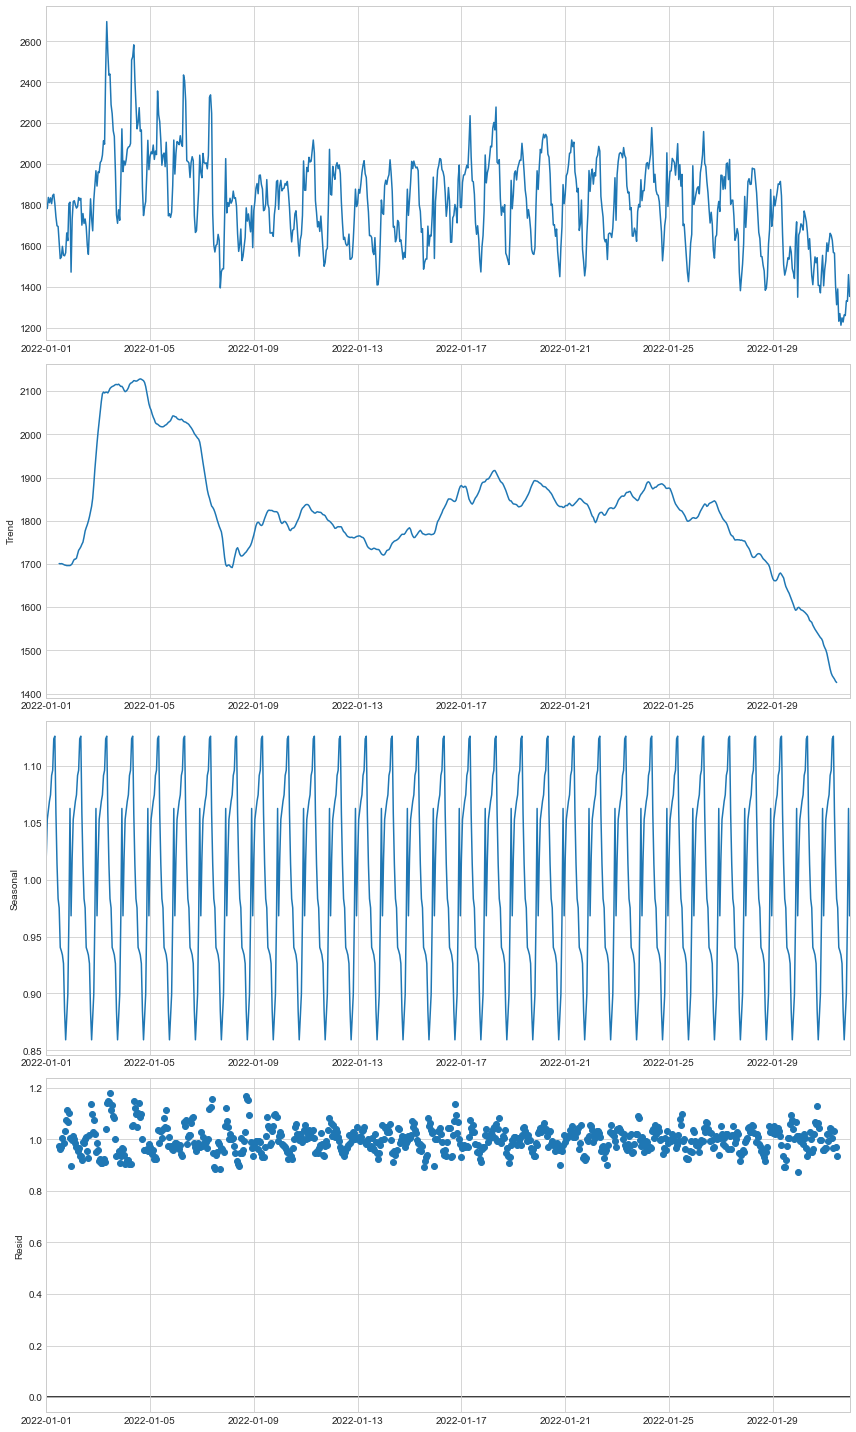

In [104]:
popl_test = popl_1_new[popl_1_new['읍면동']=='개포2동']
M_Teen = pd.pivot_table(data=popl_test, index='Datetime', values='M-Teen')
model_series = sm.tsa.seasonal_decompose(M_Teen, model='multiplicative',period = 24)
fig = model_series.plot()
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rcParams['figure.figsize'] = [25, 20]
# 예상대로 밤에는 수가 적고 낮에는 사람의 수가 증가하는 일반적인 형태이다.

---
## ACF & PACF
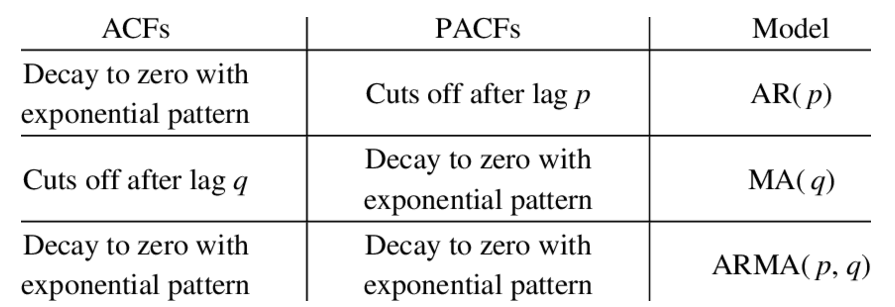
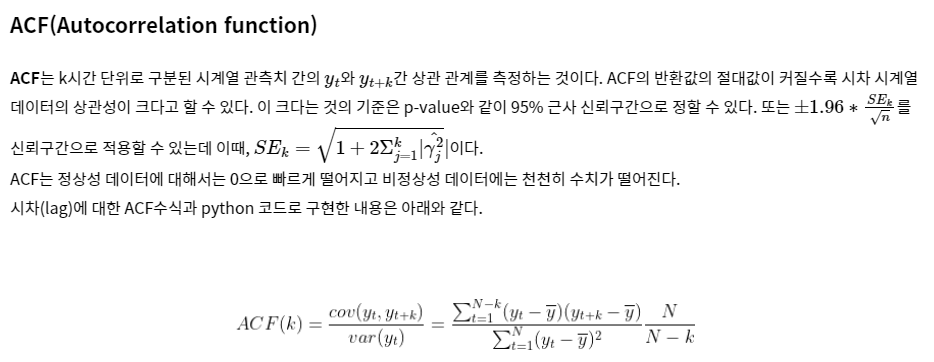
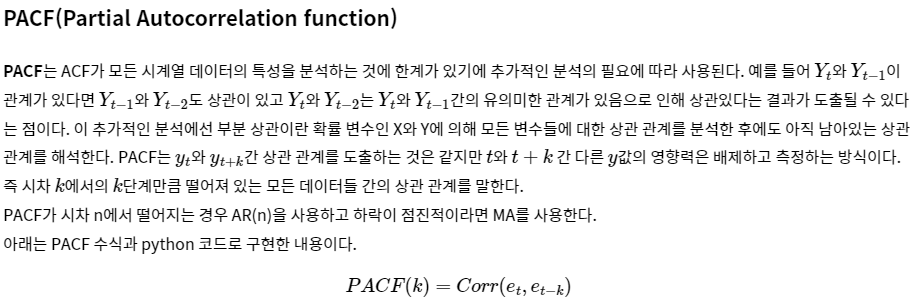

---

C:\Users\user\anaconda3\envs\caba\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


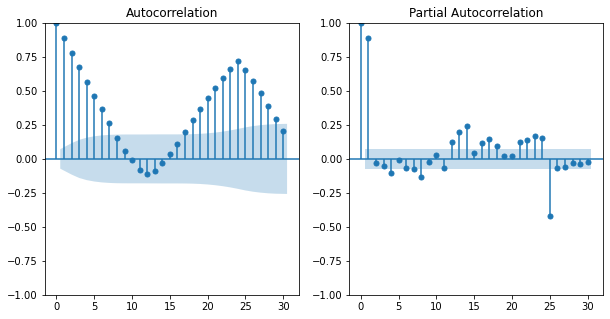

In [9]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sm.graphics.tsa.plot_acf(M_Teen.values.squeeze(), lags = 30, ax=ax[0])
sm.graphics.tsa.plot_pacf(M_Teen.values.squeeze(), lags = 30, ax=ax[1]);
# 정상 데이터에서 보이는 ACF의 코사인 그래프 곡선 그리고 시차 2부터 상관정도가 뚝 떨어지기 때문에, ARMA(2) 모형을 선택한다.

In [10]:
model = sm.tsa.arima.ARIMA(M_Teen.values, order = (2,0,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  744
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -4486.611
Date:                Wed, 14 Sep 2022   AIC                           8981.222
Time:                        14:04:06   BIC                           8999.671
Sample:                             0   HQIC                          8988.333
                                - 744                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1813.8878     33.796     53.672      0.000    1747.649    1880.127
ar.L1          0.9241      0.029     31.684      0.000       0.867       0.981
ar.L2         -0.0357      0.029     -1.225      0.221      -0.093       0.021
sigma2       1.01e+04    363.431     27.799      0.000    9390.690    1.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               148.99
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.10
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

---
# Summary 내용 정리
**Likelihood (최대우도) : 특정 데이터가 모수로 부터 추출되었을 가능도**

    - 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도함수 pdf의 y값)
    - 특정 확률 분포에서 해당 값이 나온 확률의 개념과 반대 


**AIC (Akaike Information Criterion, 아카이케 정보기준) : 데이터에 대한 모델의 상대적 품질을 수치화**

    - AIC = -2 ln(L) + 2k   (L : Likelihood function, k : Parameter)
    - 모형 적합도 함수를 이용해 계산 
    - 값이 낮을 수록 모형 적합도가 높은것을 의미함 
   
    
**BIC (Bayes Information Criterion, 베이지안 정보기준) : 데이터에 대한 모델의 상대적 품질을 수치화**

    - BIC = -2 ln(L) + log(n)p 
    - 변수가 더 많은 경우, AIC에 더 많은 패널티를 부여 
    
**HQIC (Hannan-Quinn Information Criterion, 해넌 퀸 정보기준) : 데이터에 대한 모델의 상대적 품질을 수치화**

    - HQC = -2 ln(L) + 2k ln(ln(n))
    - AIC 와 BIC 값의 대안 , Likelihood에 대한 미세 조정 함수로 사용
---

In [13]:
import itertools
p = range(0,3)
d = range(0,2)
q = range(0,3)
pdq = list(itertools.product(p,d,q))
aic = []
for i in pdq :
    model = sm.tsa.arima.ARIMA(M_Teen.values, order = (i))
    model_fit = model.fit()
    print('best AIC {1}{0}'.format(round(model_fit.aic, 2), i))
    aic.append((round(model_fit.aic, 2),i))
print(min(aic))

best AIC (0, 0, 0)10151.12
best AIC (0, 0, 1)9547.27
best AIC (0, 0, 2)9308.89
best AIC (0, 1, 0)9003.03
best AIC (0, 1, 1)9004.73
best AIC (0, 1, 2)9006.6
best AIC (1, 0, 0)8980.14
best AIC (1, 0, 1)8981.31
best AIC (1, 0, 2)8982.21
best AIC (1, 1, 0)9004.73
best AIC (1, 1, 1)8967.78
best AIC (1, 1, 2)9006.85
best AIC (2, 0, 0)8981.22


C:\Users\user\anaconda3\envs\caba\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\envs\caba\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


best AIC (2, 0, 1)8982.56
best AIC (2, 0, 2)8974.62
best AIC (2, 1, 0)9006.59
best AIC (2, 1, 1)9006.64
best AIC (2, 1, 2)8982.27
(8967.78, (1, 1, 1))


C:\Users\user\anaconda3\envs\caba\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [72]:
from sklearn.metrics import r2_score
model_opt = sm.tsa.arima.ARIMA(M_Teen.values, order = min(aic)[1])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()
popl_test_pr = popl_2_new[popl_2_new['읍면동']=='개포2동']['M-Twenties']
prediction = model_opt_fit.forecast(len(popl_test_pr))
r2 = r2_score(popl_test_pr, prediction)

In [87]:
prediction = model_opt_fit.forecast(len(popl_test_pr))
popl_test_pr

Datetime
2022-02-01 00:00:00    1128.3948
2022-02-01 01:00:00    1142.2354
2022-02-01 02:00:00    1165.6521
2022-02-01 03:00:00    1130.9499
2022-02-01 04:00:00    1135.3818
                         ...    
2022-02-28 19:00:00     960.1287
2022-02-28 20:00:00     999.7478
2022-02-28 21:00:00    1070.1420
2022-02-28 22:00:00    1171.8780
2022-02-28 23:00:00    1105.7658
Name: M-Twenties, Length: 672, dtype: float64

Text(0.5, 1.0, 'r2 score : -25.194123662925865')

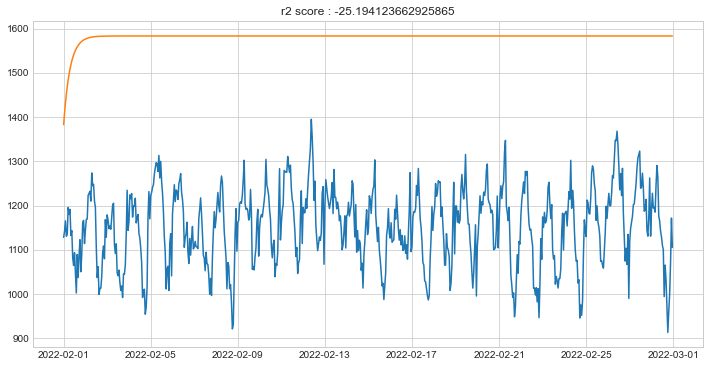

In [101]:
fig, ax = plt.subplots(figsize = (12,6))
plt.plot(popl_test_pr) 
plt.plot(popl_test_pr.index, prediction)
plt.title('r2 score : {0}'.format(r2))
# 데이터 부족으로 제대로 학습이 안되었고, 계절요인을 잡지못하고 있다. SARIMA 사용

---
# SARIMA란?
ARIMA는 Non-Seasonal을 가정함으로 그 한계가 존재한다. 이를 위해 계절성 주기를 분석에 적용하는 SARIMA 모델이 있다. 
### 계절성이란?
어떤 특정한 패턴이 주기적으로 나타나는 거을 뜻한다. 예를 들어 임의의 시계열 데이터가 houly 베이스라면, daily 주기 기반 패턴이 발생할 가능성이 높다.
### SARIMA Prameter
(p,d,q)(P,D,Q,m)으로 이루어져있다. p,d,q는 기존 ARIMA와 똑같고, P,D,Q는 계절적 요인에 순서대로 AR, Difference, MA를 적용한 것과 같다. m은 계절 주기를 뜻한다.

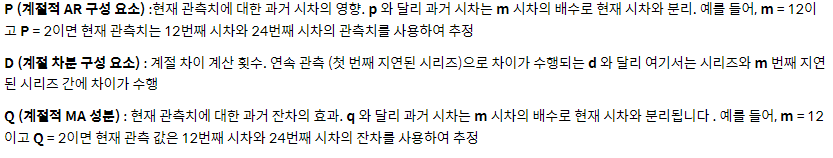

---

In [107]:
pdq = (2,0,2)
p = range(0,3)
d = range(1,2)
q = range(0,3)
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]
aic = []
params = []
for i in seasonal_pdq:
    try:
        model = SARIMAX(M_Teen.values, order = pdq, seasonal_order = (i))
        model_fit = model.fit()
        print('best AIC {1}{0}'.format(round(model_fit.aic, 2), i))
        aic.append((round(model_fit.aic, 2),i))
    except:
        continue

C:\Users\user\anaconda3\envs\caba\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\envs\caba\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


best AIC (0, 1, 0, 24)8528.27
best AIC (0, 1, 1, 24)8306.96
best AIC (0, 1, 2, 24)8288.1
best AIC (1, 1, 0, 24)8428.78
best AIC (1, 1, 1, 24)8285.51
best AIC (1, 1, 2, 24)8287.23
best AIC (2, 1, 0, 24)8381.78
best AIC (2, 1, 1, 24)8287.28


C:\Users\user\anaconda3\envs\caba\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


best AIC (2, 1, 2, 24)8289.11


In [109]:
model = SARIMAX(M_Teen.values, order = pdq, seasonal_order = min(aic)[1])
model_fit = model.fit()
prediction = model_fit.get_forecast(len(popl_test_pr))
prediction

In [112]:
predicted_value = prediction.predicted_mean
r2 = r2_score(popl_test_pr, predicted_value)

Text(0.5, 1.0, 'r2 score : -53.828379263814')

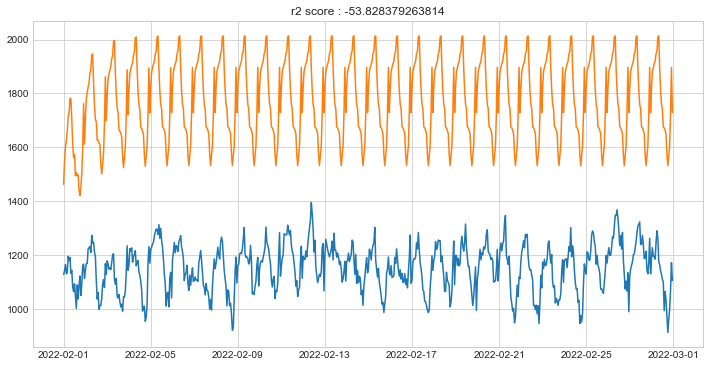

In [115]:
fig, ax = plt.subplots(figsize = (12,6))
plt.plot(popl_test_pr) 
plt.plot(popl_test_pr.index, predicted_value)
plt.title('r2 score : {0}'.format(r2))
# r2 score는 더 낮아져 더욱 더욱 더욱 의미없는 모델이 되었지만 변동성은 어느정도 잡아준것 같다.

In [76]:
data_array = [popl_ly9, popl_ly10, popl_ly11, popl_ly12, popl_1, popl_2, popl_3, popl_4, popl_5, popl_6, popl_7,popl_8]
for i in range(len(data_array)):
    popl_ly8 = pd.concat([popl_ly8, data_array[i]], axis = 0)
train_set = popl_ly8.loc[:'2022-07-31 23:00:00',:]
test_set = popl_ly8.loc['2022-08-01 00:00:00':,:]

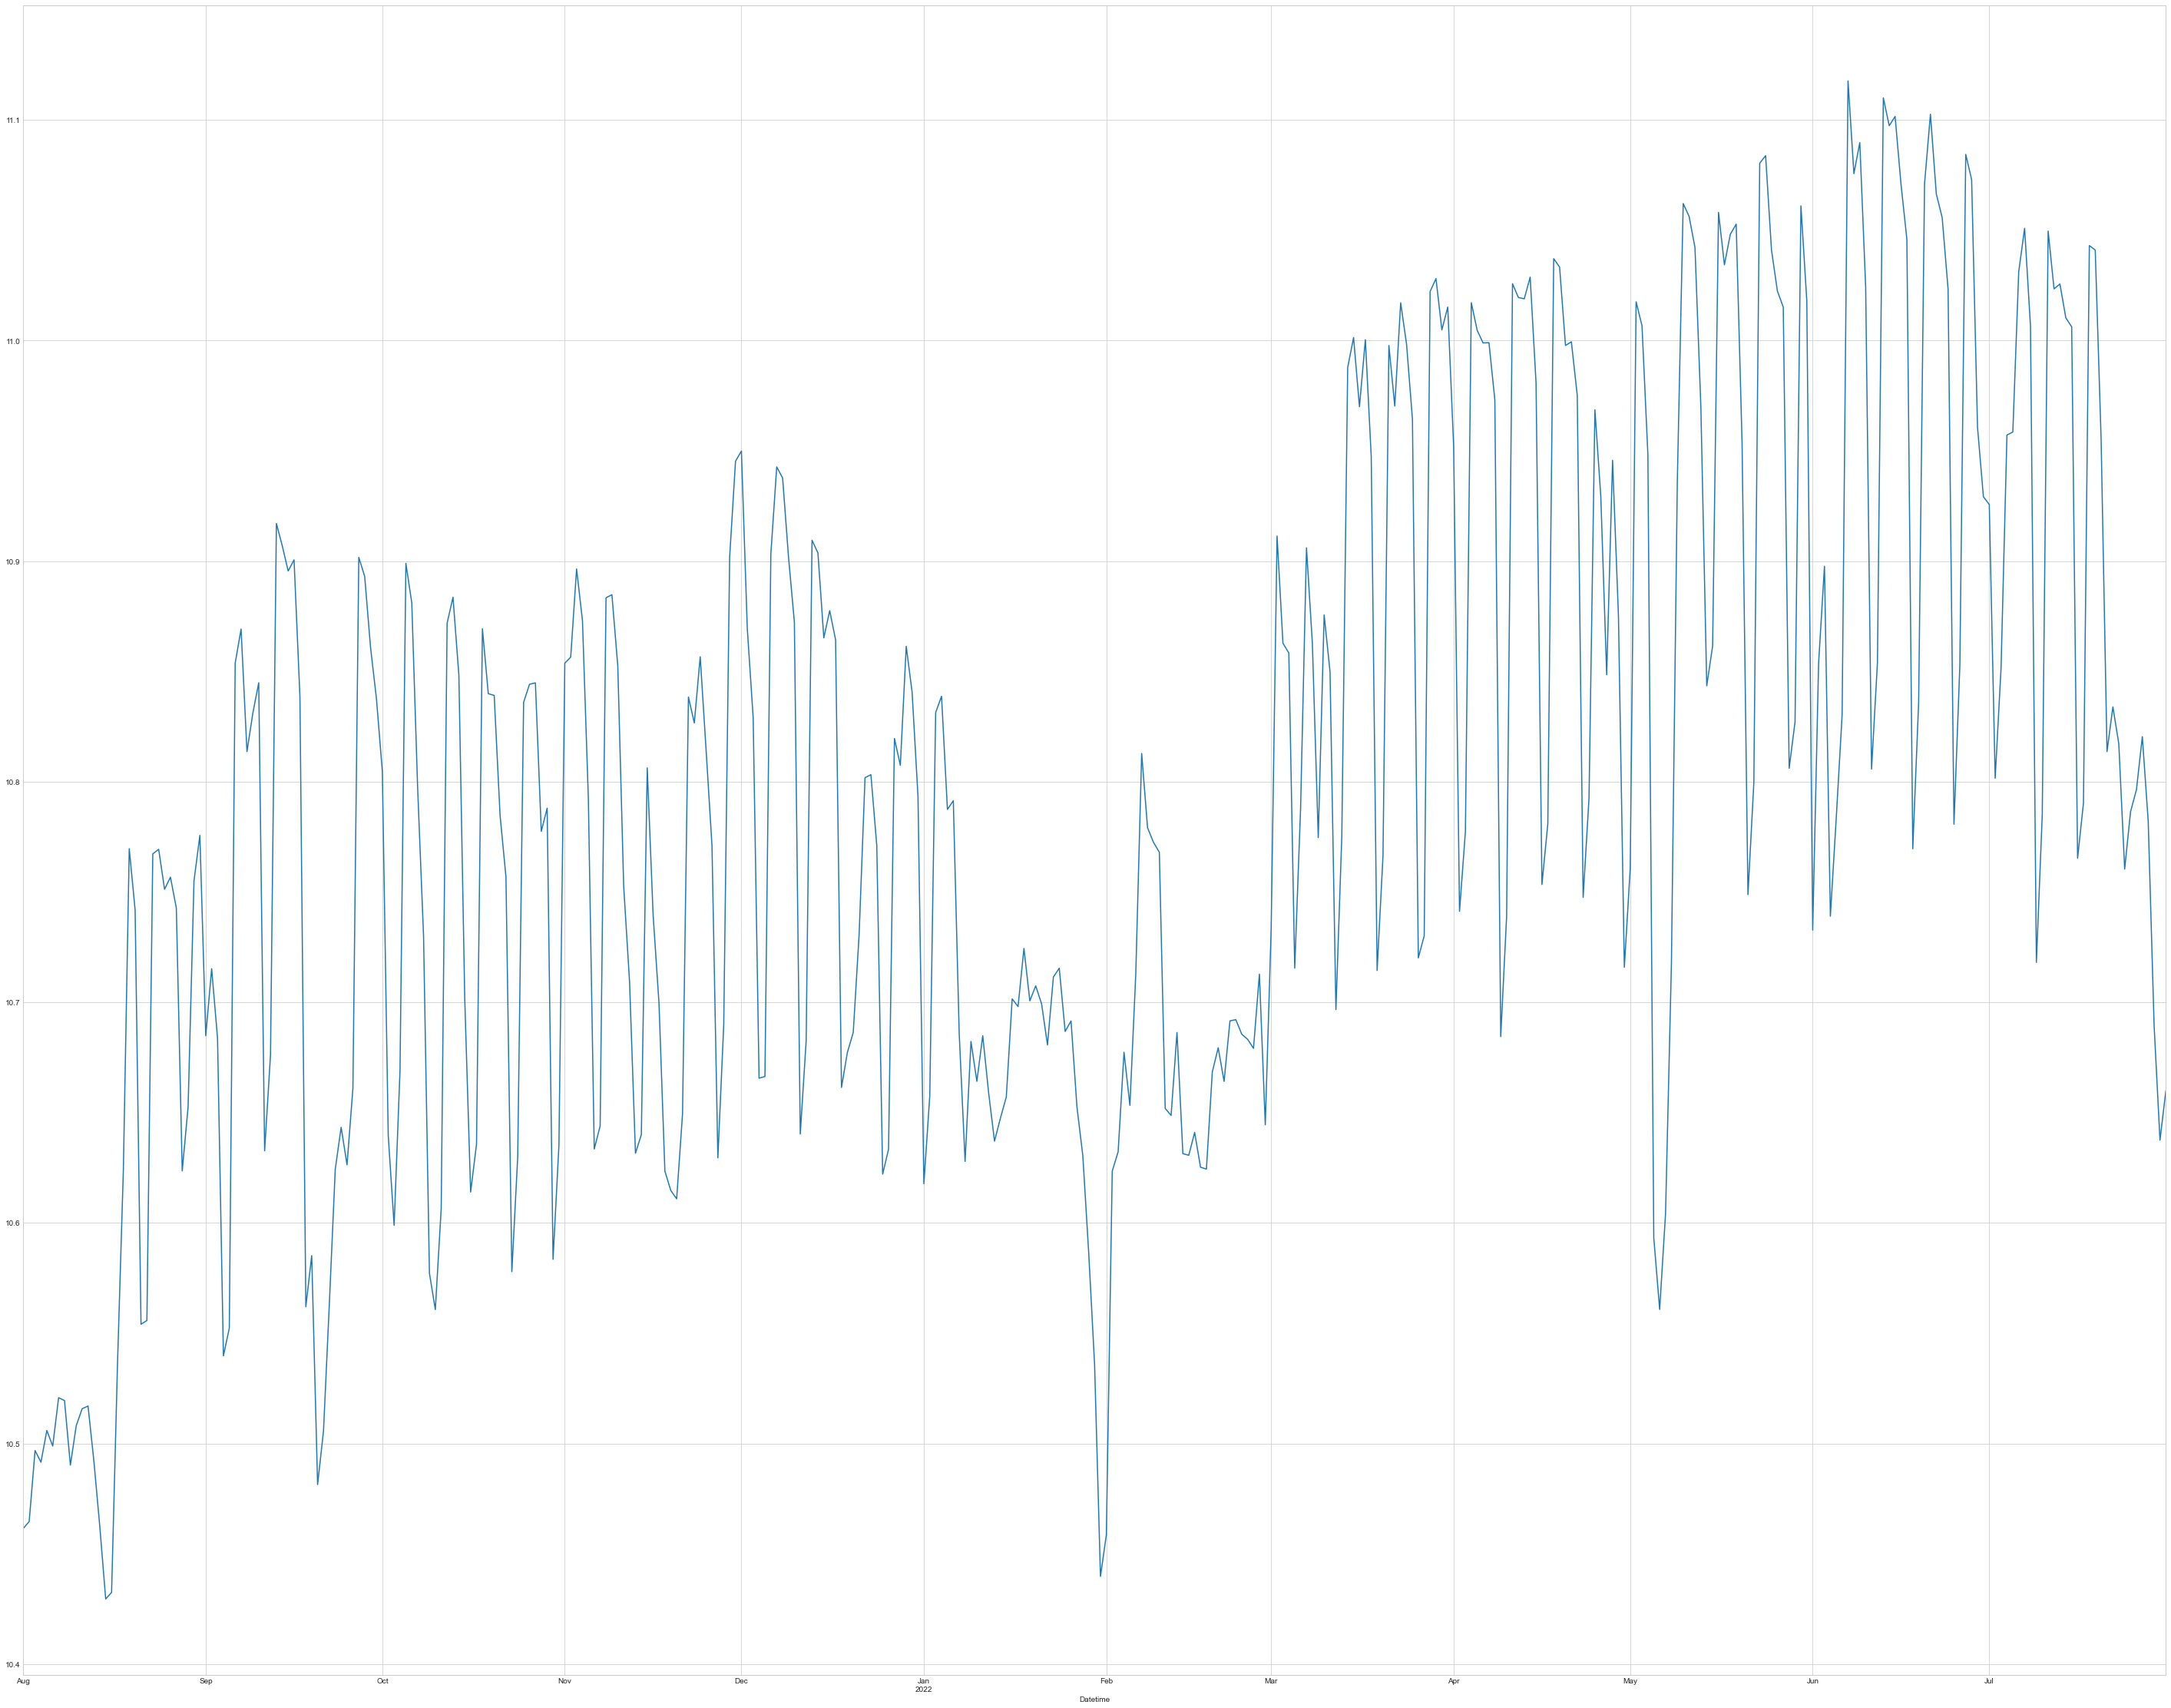

In [79]:
import numpy as np
popl_train = train_set[train_set['읍면동']=='개포2동']
M_Teen = pd.pivot_table(data=popl_train, index='Datetime', values='M-Teen')
y_hat = M_Teen['M-Teen'].resample('24h').sum()# 데이터가 너무커서 좀 줄임
y_hat_log = np.log1p(y_hat)
plt.rcParams['figure.figsize'] = [50, 40]
fig = y_hat_log.plot()

C:\Users\user\anaconda3\envs\caba\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


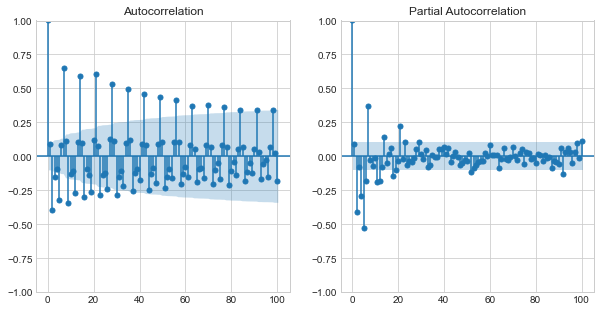

In [56]:
y_hat_df = pd.DataFrame(data = y_hat_log.values, index = y_hat_log.index, columns = ['M-Teen'])
y_hat_df= y_hat_df['M-Teen'].diff()
y_hat_df = y_hat_df.fillna( method='bfill' )
fig, ax = plt.subplots(1,2, figsize = (10,5))
sm.graphics.tsa.plot_acf(y_hat_df.values.squeeze(), lags = 100, ax=ax[0])
sm.graphics.tsa.plot_pacf(y_hat_df.values.squeeze(), lags = 100, ax=ax[1]);
# ARIMA 모형으로 분석 한계가 있어보인다.

In [1]:
# 파라미터 튜닝 - 결과는 메모리 부족
# import time
# import itertools
# start = time.time()
# p = range(0,3)
# d = range(1,2)
# q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]
# aic = []
# for j in pdq:
#     for i in seasonal_pdq:
#         try:
#             model = SARIMAX(M_Teen.values, order = (j), seasonal_order = (i))
#             model_fit = model.fit()
#             print('AIC {1}{0}'.format(round(model_fit.aic, 2)))
#             aic.append((round(model_fit.aic, 2),i,j))
#         except:
#             continue
# print("best AIC : {0}, Best Param : {1}{2}".format(min(aic)[0], min(aic)[1], min(aic)[2]))
# print("time :", time.time() - start)

In [80]:
# 파라미터 튜닝
import time
start = time.time()
auto_arima_model = auto_arima(y_hat_log, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m =6,
                              seasonal = True, d = 1, max_d = 1, D = 1, max_P=3, max_Q = 3, trace= True,
                              error_action = 'ignore',suppress_warnings = True, stepwise = False)
print("time :", time.time() - start)
print(auto_arima_model.summary())

 ARIMA(0,1,0)(0,1,0)[6]             : AIC=-350.123, Time=0.14 sec
 ARIMA(0,1,0)(0,1,1)[6]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,1,2)[6]             : AIC=inf, Time=1.02 sec
 ARIMA(0,1,0)(0,1,3)[6]             : AIC=inf, Time=1.31 sec
 ARIMA(0,1,0)(1,1,0)[6]             : AIC=-383.340, Time=0.13 sec
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(1,1,2)[6]             : AIC=inf, Time=1.97 sec
 ARIMA(0,1,0)(1,1,3)[6]             : AIC=-588.493, Time=2.52 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=-442.723, Time=0.24 sec
 ARIMA(0,1,0)(2,1,1)[6]             : AIC=inf, Time=1.55 sec
 ARIMA(0,1,0)(2,1,2)[6]             : AIC=inf, Time=1.65 sec
 ARIMA(0,1,0)(2,1,3)[6]             : AIC=inf, Time=4.10 sec
 ARIMA(0,1,0)(3,1,0)[6]             : AIC=-456.010, Time=0.52 sec
 ARIMA(0,1,0)(3,1,1)[6]             : AIC=inf, Time=3.22 sec
 ARIMA(0,1,0)(3,1,2)[6]             : AIC=inf, Time=5.23 sec
 ARIMA(0,1,1)(0,1,0)[6]             : AIC=-361.368, Time=0.1

C:\Users\user\anaconda3\envs\caba\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Text(0.5, 1.0, 'r2 score : -22.54642854862718')

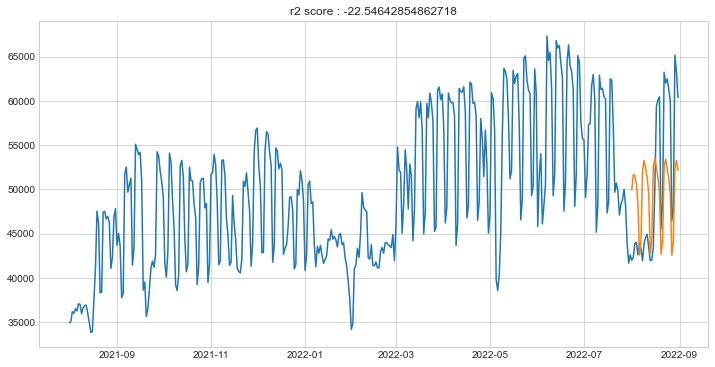

In [229]:
# 직관적 파라미터 튜팅 후 적용
model_opt = SARIMAX(y_hat_log.values, order = (2,1,2), seasonal_order = (1,1,1,7))
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

popl_confirm = test_set[test_set['읍면동']=='개포2동']
popl_confirm = popl_confirm['M-Teen'].resample('24h').sum()
prediction2 = model_opt_fit.get_forecast(len(popl_confirm), return_conf_int = True)
prediction2_value = np.expm1(prediction2.predicted_mean)

a = popl_ly8[popl_ly8['읍면동']=='개포2동']
b = pd.pivot_table(data=a, index='Datetime', values='M-Teen')
c = b['M-Teen'].resample('24h').sum() #전체 데이터

r2 = r2_score(popl_confirm, prediction2_value)
fig, ax = plt.subplots(figsize = (12,6))
plt.plot(c) 
plt.plot(popl_confirm.index, prediction2_value)
plt.title('r2 score : {0}'.format(r2))

In [228]:
prediction2.predicted_mean

array([10.8107148 , 10.86342735, 10.7889537 , 10.76576159, 10.75457956,
       10.77978537, 10.76943829, 10.82935019, 10.85276442, 10.77987507,
       10.78445694, 10.81580962, 10.80345008, 10.80866093, 10.80837366,
       10.77686451, 10.70552376, 10.7561576 , 10.78676246, 10.81995608,
       10.84393479, 10.82830698, 10.83161322, 10.79156488, 10.82406613,
       10.83473142, 10.81750834, 10.83857384, 10.81398873, 10.77795122,
       10.79239919])

Text(0.5, 1.0, 'r2 score : -21.91148740797649')

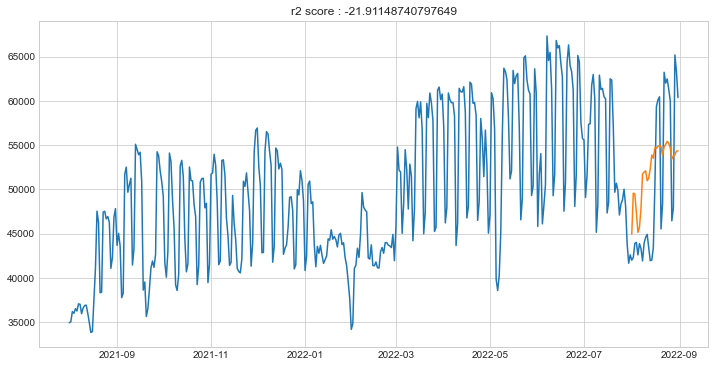

In [126]:
# auto-arima 기반 모델
from sklearn.metrics import r2_score
popl_confirm = test_set[test_set['읍면동']=='개포2동']
popl_confirm = popl_confirm['M-Teen'].resample('24h').sum()
# M_Teen = pd.pivot_table(data=popl_test, index='Datetime', values='M-Teen')
prediction = auto_arima_model.predict(len(popl_confirm), return_conf_int = True)
prediction_value = np.expm1(prediction[0])
predict_index = list(popl_confirm.index)
r2 = r2_score(popl_confirm, prediction_value)
a = popl_ly8[popl_ly8['읍면동']=='개포2동']
b = pd.pivot_table(data=a, index='Datetime', values='M-Teen')
c = b['M-Teen'].resample('24h').sum()
fig, ax = plt.subplots(figsize = (12,6))
plt.plot(c) 
plt.plot(popl_confirm.index, prediction_value)
plt.title('r2 score : {0}'.format(r2))